In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
images = df[df.columns[1:]]
label = df['label']

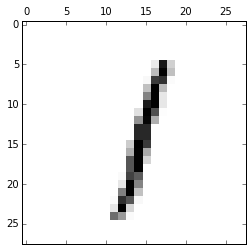

In [4]:
#to visualize, reshape it as a 28x28 box
boximages = np.array(images).reshape(42000,28,28)
plt.matshow(boximages[15],cmap=plt.cm.Greys)

In [41]:
average_ones = np.mean(boximages[np.array(label==1)], axis=0)

In [109]:
def plot_averages(data,actual):
    fig = plt.figure(figsize = (10,5))
    for i in range(10):
        plt.subplot(2,5,i+1).matshow(np.mean(data[np.array(actual==i)], axis=0),cmap=plt.cm.Greys)


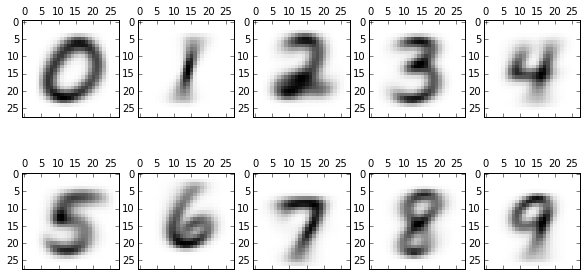

In [110]:
plot_averages(boximages,label)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(images,
                                                    label,
                                                    test_size = .05)

In [112]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=10, p=2, weights='uniform')

In [115]:
y_fit = knn.predict(X_test)

In [116]:
accuracy_score(y_test,y_fit)

0.96047619047619048

In [123]:
residual = [val!=valb for i, (val,valb) in enumerate(zip(y_test,y_fit))]

In [138]:
residual = np.array(residual)

In [132]:
X_images = np.array(X_test).reshape(len(X_test),28,28)

In [146]:
X_residual = X_images[residual]

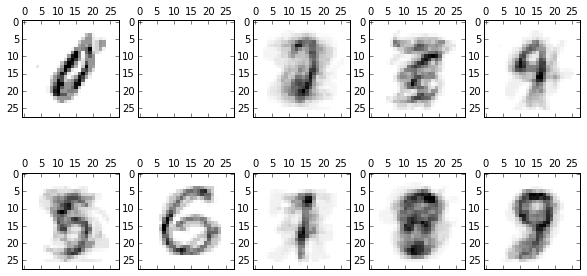

In [154]:
plot_averages(X_residual,y_test[residual])

In [155]:
# plt.matshow(np.mean(X_residual[np.array(y_test[residual]==2)],axis=0),cmap=plt.cm.Greys)

In [70]:
def show_img(i):
    boximages = np.array(X_test).reshape(len(X_test),28,28)
    print 'Actual:', list(y_test)[i]
    print 'Predicted:', list(y_fit)[i]
    plt.matshow(boximages[i],cmap=plt.cm.Greys)

Actual: 2
Predicted: 8


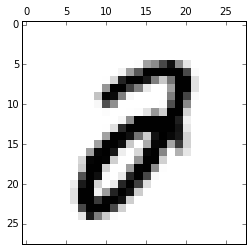

In [114]:
show_img(2035)

In [173]:
confusion = np.zeros([10,10])
for i,j in zip(y_test,y_fit):
    confusion[i][j]+=1

In [175]:
print confusion

[[ 205.    0.    0.    0.    0.    1.    1.    0.    0.    0.]
 [   0.  253.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   4.    3.  174.    1.    1.    0.    0.    5.    2.    0.]
 [   0.    0.    1.  182.    0.    1.    1.    2.    2.    0.]
 [   0.    1.    0.    0.  212.    0.    1.    1.    0.    6.]
 [   0.    0.    0.    3.    0.  175.    1.    2.    1.    1.]
 [   1.    0.    0.    0.    0.    2.  189.    0.    0.    0.]
 [   0.    7.    1.    0.    0.    0.    0.  219.    0.    2.]
 [   0.    1.    0.    3.    1.    3.    3.    1.  185.    5.]
 [   1.    0.    0.    2.    2.    1.    0.    4.    1.  223.]]


In [192]:
percentage = confusion/np.sum(confusion, axis=1)

In [205]:
for i in range(10):
    percentage[i][i] = 0

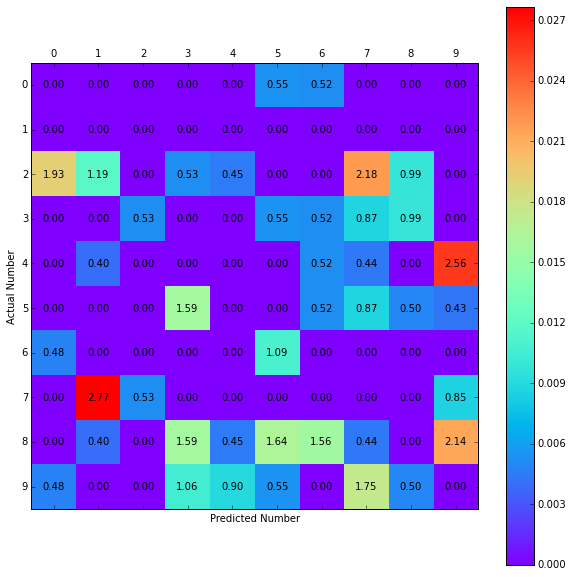

In [246]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,10))
# plt.figure()
c = ax.matshow(percentage,cmap=plt.cm.rainbow)
fig.colorbar(c)
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel('Predicted Number')
plt.ylabel('Actual Number')

for (i, j), z in np.ndenumerate(percentage):
    ax.text(j, i, '{:0.2f}'.format(z*100), ha='center', va='center')

# Centering Calculations

In [80]:
3<<2

12

In [82]:
indices = np.arange(28)
X, Y = np.meshgrid(indices, indices)

In [97]:
test = np.array(images)[0]

In [111]:
np.sum(test.reshape(28,28) *X)/np.sum(test)

13

In [112]:
np.sum(test.reshape(28,28) *Y)/np.sum(test)

13